In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    

In [ ]:
gauss_kernel = np.array([[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]])
sobel_kernel_x = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])

print(gause_kernel)
print(sobel_kernel_x)
print(sobel_kernel_y)


[[1 2 1]
 [2 4 2]
 [1 2 1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [ ]:
def set_border(arr):
  row, col = arr.shape
  br = row + 2
  bc = col + 2
  border_arr = np.zeros((br, bc))
  
  for i in range(br):
    for j in range(bc):
      if i == 0 and j == 0:
        border_arr[i][j] = arr[0][0]
      elif i == 0 and j == bc - 1:
        border_arr[i][j] = arr[0][col - 1]
      elif i == br - 1 and j == 0 :
        border_arr[i][j] = arr[row - 1][0]
      elif i == br - 1 and j == bc - 1:
        border_arr[i][j] = arr[row - 1][col - 1]
      elif i == 0:
        border_arr[i][j] = arr[0][j - 1]
      elif i == br - 1:
        border_arr[i][j] = arr[row - 1][j - 1]
      elif j == 0:
        border_arr[i][j] = arr[i - 1][0]
      elif j == bc - 1:
        border_arr[i][j] = arr[i - 1][col-1]
      else:
        border_arr[i][j] = arr[i - 1][j - 1]

  return border_arr


In [ ]:
def filter_2d(img_arr, kernel):
  if(kernel.shape[0] != 3 and kernel.shape[1] != 3):
      return img_arr
  border_img = set_border(img_arr)
  r, c = border_img.shape
  filtered_img = np.zeros((r, c))
  kernel_weight = kernel.sum()
  if(kernel_weight == 0):
    kernel_weight = 1
  
  for i in range(1, r - 1):
    for j in range(1, c - 1):
      pixel_mat = border_img[i - 1 : i + 2, j - 1: j + 2]
      conv = pixel_mat * kernel
      conv_pixel = conv.sum()/kernel_weight
      filtered_img[i][j] = conv_pixel
  return filtered_img[1:r-1, 1:c-1]


In [ ]:

def gauss(x, y):
  gauss_sigma = 3
  sq = (x * x) + (y * y)
  exp_val = np.exp(-(sq / (2 * (gauss_sigma ** 2))))
  val =  (1.0 / (2 * math.pi * (gauss_sigma ** 2))) * exp_val
  return val

In [ ]:
k = 1
x = np.linspace(-k, k, 2*k + 1)
y = np.linspace(-k, k, 2*k + 1)

X, Y = np.meshgrid(x, y)
Z = gauss_kernel#f(X, Y)


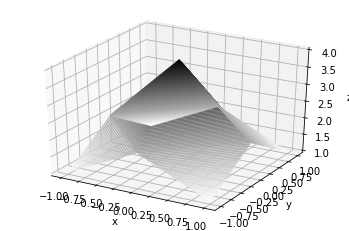

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


In [ ]:
test_smoothing_img = plt.imread("nothing.jpg")
test_smoothing_gray = rgb2gray(test_smoothing_img)


In [ ]:
test_smoothing_smooth = filter_2d(test_smoothing_gray, gause_kernel)


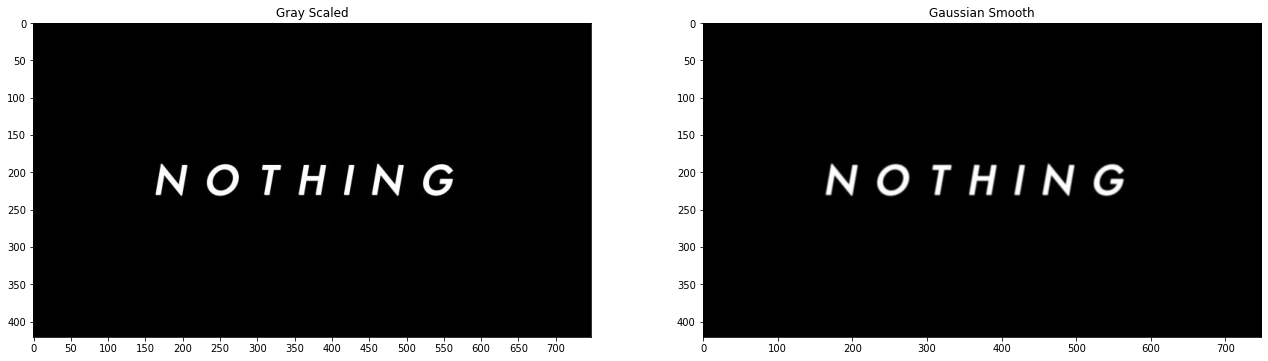

In [ ]:
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(test_smoothing_gray, cmap='gray')
plt.title("Gray Scaled")
plt.xticks(np.arange(0, test_smoothing_img.shape[1],50))
plt.yticks(np.arange(0, test_smoothing_img.shape[0],50))
plt.subplot(122)
plt.imshow(test_smoothing_smooth, cmap='gray')
plt.title("Gaussian Smooth")
# plt.xticks([])
# plt.yticks([])
plt.show()

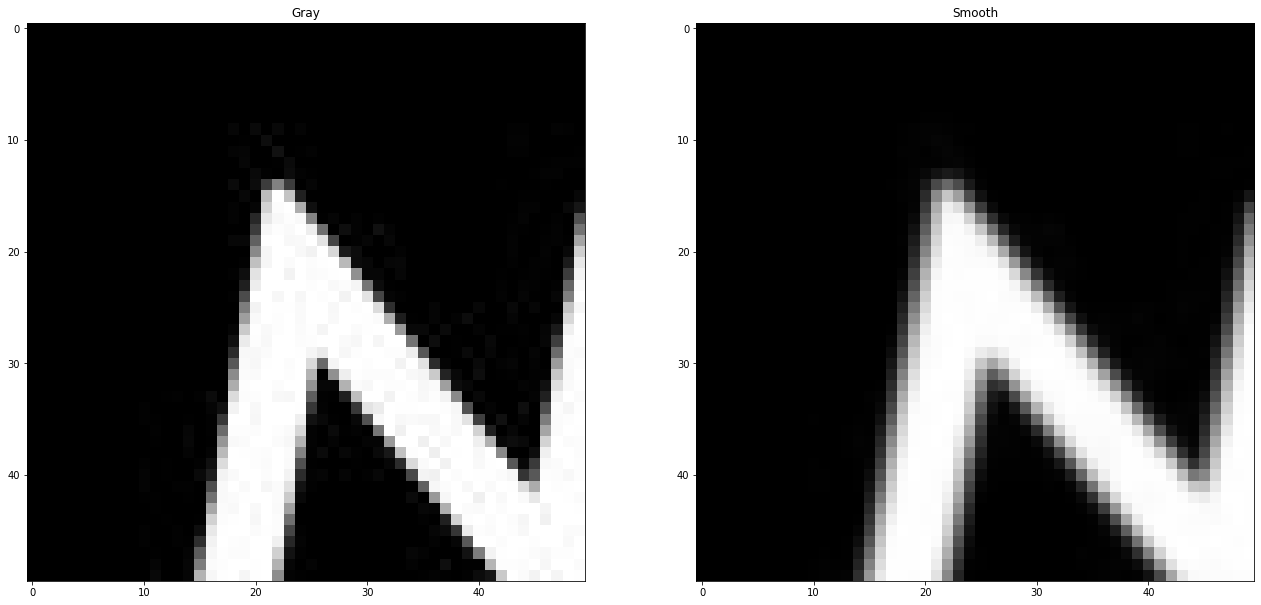

In [ ]:
tt = test_smoothing_gray[175:225, 150:200]
tt1 = test_smoothing_smooth[175:225, 150:200]
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(tt, cmap='gray')
plt.title("Gray")
# plt.xticks(np.arange(0, thanks_img.shape[1],50))
# plt.yticks(np.arange(0, thanks_img.shape[0],50))
plt.subplot(122)
plt.imshow(tt1, cmap='gray')
plt.title("Smooth")
# plt.xticks([])
# plt.yticks([])
plt.show()

In [ ]:
img = plt.imread('people.jpeg')


In [ ]:
img_gray = rgb2gray(img)

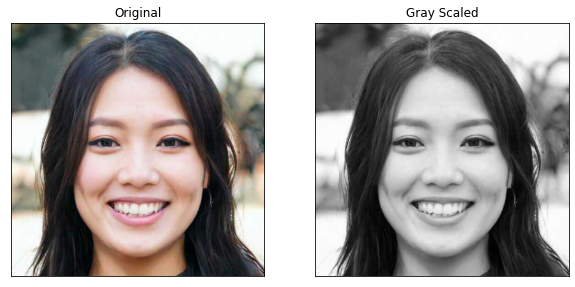

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_gray, cmap="gray")
plt.title("Gray Scaled")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
gaussian_smooth_img = filter_2d(img_gray, gauss_kernel)


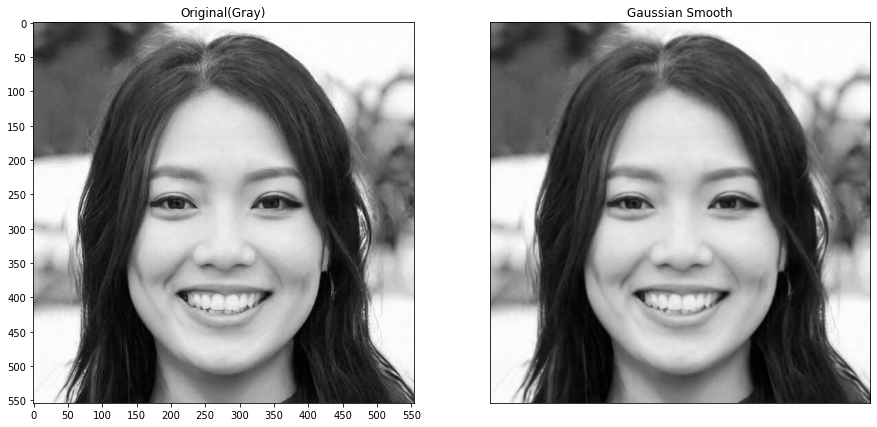

In [ ]:
plt.figure(figsize=(15,40))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title("Original(Gray)")
plt.xticks(np.arange(0, img_gray.shape[1], 50))
plt.yticks(np.arange(0, img_gray.shape[0], 50))
plt.subplot(122)
plt.imshow(gaussian_smooth_img, cmap='gray')
plt.title("Gaussian Smooth")
plt.xticks([])
plt.yticks([])
plt.show()

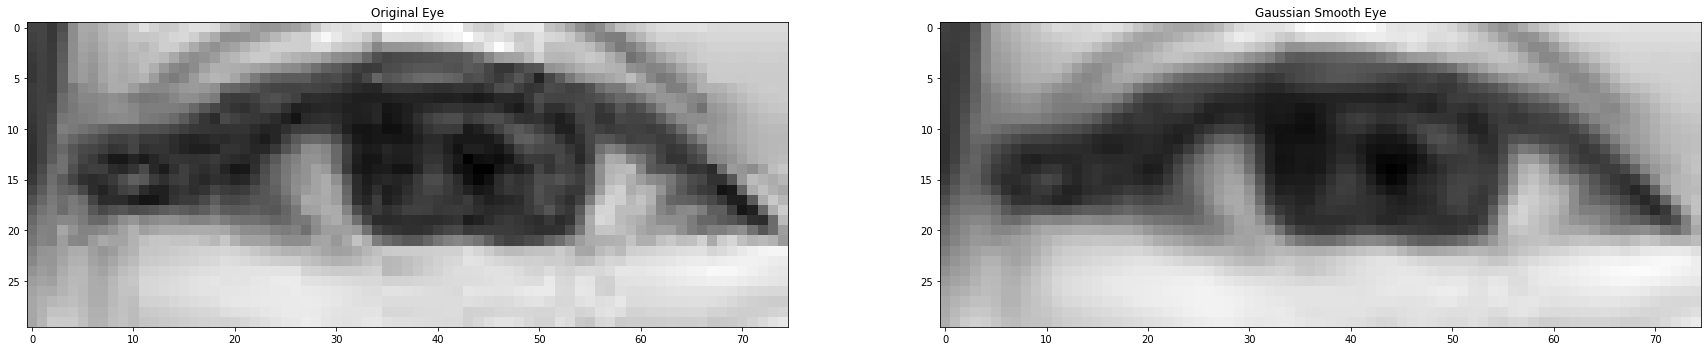

In [ ]:
eye_1 = img_gray[250:280, 165:240]
eye_2 = gaussian_smooth_img[250:280, 165:240]
plt.figure(figsize=(30,20))
plt.subplot(121)
plt.imshow(eye_1, cmap='gray')
plt.title("Original Eye")
plt.subplot(122)
plt.imshow(eye_2, cmap='gray')
plt.title("Gaussian Smooth Eye")
plt.show()

In [ ]:
sobel_img_x_direction = filter_2d(gaussian_smooth_img, sobel_kernel_x)
sobel_img_y_direction = filter_2d(gaussian_smooth_img, sobel_kernel_y)

In [ ]:
sobel_img_x_direction = sobel_img_x_direction / sobel_img_x_direction.max() * 255.0
sobel_img_y_direction = sobel_img_y_direction / sobel_img_y_direction.max() * 255.0

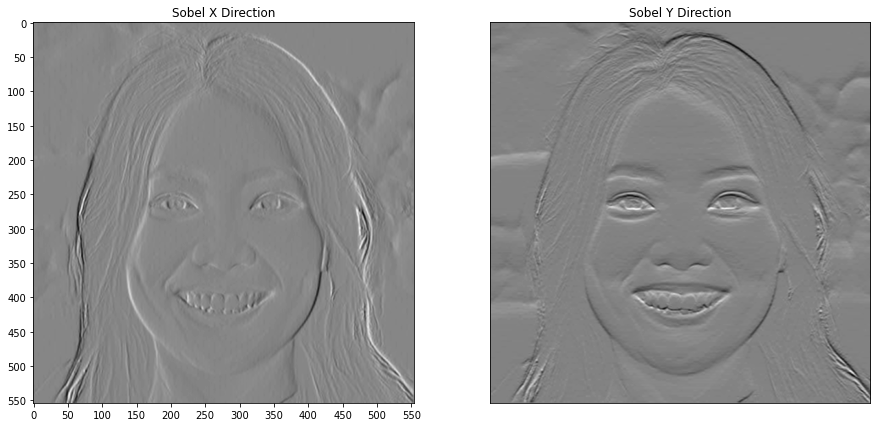

In [ ]:
plt.figure(figsize=(15,40))
plt.subplot(121)
plt.imshow(sobel_img_x_direction, cmap='gray')
plt.title("Sobel X Direction")
plt.xticks(np.arange(0, sobel_img_x_direction.shape[1], 50))
plt.yticks(np.arange(0, sobel_img_x_direction.shape[0], 50))
plt.subplot(122)
plt.imshow(sobel_img_y_direction, cmap='gray')
plt.title("Sobel Y Direction")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
sobel_img_gradient = np.hypot(sobel_img_x_direction, sobel_img_y_direction)

In [ ]:
sobel_img_gradient = sobel_img_gradient / sobel_img_gradient.max() * 255.0

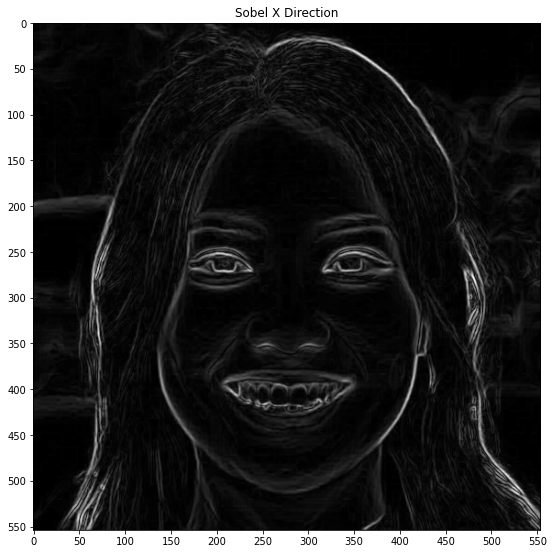

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(121)
plt.imshow(sobel_img_gradient, cmap='gray')
plt.title("Sobel X Direction")
plt.xticks(np.arange(0, sobel_img_gradient.shape[1], 50))
plt.yticks(np.arange(0, sobel_img_gradient.shape[0], 50))
plt.show()